## Holiday Package Prediciton

### 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
### 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
The data consists of 20 column and 4888 rows.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 1 .**let us Read the data from csv File**

In [2]:
df=pd.read_csv('Travel.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
df['ProdTaken'].value_counts()


ProdTaken
0    3968
1     920
Name: count, dtype: int64

## Data Cleaning
### Handling Missing values
1. Handling Missing values
2. Handling Duplicates
3. Check data type
4. Understand the dataset

In [7]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [9]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

### Replacing this Value which  meant same , which lead to the duplicates value

In [10]:
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')
df['Gender']=df['Gender'].replace('Fe Male','Female')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [12]:
## Features with the Na values
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
feature_na

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [13]:
df[feature_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [14]:
df[feature_na]

,Age,TypeofContact,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
0,41.0,Self Enquiry,6.0,3.0,3.0,1.0,0.0,20993.0
1,49.0,Company Invited,14.0,4.0,4.0,2.0,2.0,20130.0
2,37.0,Self Enquiry,8.0,4.0,3.0,7.0,0.0,17090.0
3,33.0,Company Invited,9.0,3.0,3.0,2.0,1.0,17909.0
4,NaN,Self Enquiry,8.0,3.0,4.0,1.0,0.0,18468.0
...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,9.0,5.0,4.0,2.0,1.0,26576.0
4884,28.0,Company Invited,31.0,5.0,3.0,3.0,2.0,21212.0
4885,52.0,Self Enquiry,17.0,4.0,4.0,7.0,3.0,31820.0
4886,19.0,Self Enquiry,16.0,4.0,3.0,3.0,2.0,20289.0


### let us handle the null Values

In [15]:
import warnings 
warnings.filterwarnings('ignore')

In [16]:
## Handling the null value of 
# Age,
# TypeofContact,
# DurationOfPitch,
# NumberOfFollowups,
# PreferredPropertyStar,
# NumberOfTrips, 
# NumberOfChildrenVisiting,
# MonthlyIncome
df['Age'].fillna(df['Age'].median(),inplace=True)
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0],inplace=True)
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(),inplace=True)
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mean(),inplace=True)
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mean(),inplace=True)
df['NumberOfTrips'].fillna(df['NumberOfTrips'].mode()[0],inplace=True)
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mean(),inplace=True)
df['MonthlyIncome']=df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),inplace=True)

In [17]:
df.isnull().sum()

CustomerID                     0
ProdTaken                      0
Age                            0
TypeofContact                  0
CityTier                       0
DurationOfPitch                0
Occupation                     0
Gender                         0
NumberOfPersonVisiting         0
NumberOfFollowups              0
ProductPitched                 0
PreferredPropertyStar          0
MaritalStatus                  0
NumberOfTrips                  0
Passport                       0
PitchSatisfactionScore         0
OwnCar                         0
NumberOfChildrenVisiting       0
Designation                    0
MonthlyIncome               4888
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

In [33]:
### All short of cleaning we have perform we need to now do some Feature Engineering

### Feature Engineering

In [19]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,None
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,None
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,None
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,None
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,None


In [35]:
### There is no used of Cusmtomer for predicts so we can simply remove it

In [20]:
df.drop('CustomerID',axis=1,inplace=True)

In [21]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,None
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,None
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,None
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,None
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,None


In [22]:
## One more thing we can observer is that there is two column for visiting which gives the no. of people and child visited ,
## we can combine them in single feature as total no. of people visited
df['Total_Person']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Total_Person
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,None,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,None,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,None,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,None,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,None,2.0


In [23]:
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'],axis=1,inplace=True)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_Person
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,None,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,None,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,None,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,None,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,None,2.0


### Dependent and Independent features

In [24]:
x=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

In [25]:
x.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_Person
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,None,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,None,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,None,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,None,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,None,2.0


### We have to perform the train-test split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=42)
X_train.shape , X_test.shape

((3421, 17), (1467, 17))

### We have to perform some encoding to the categorical features as well as Standardization for numerical_data

In [27]:
numerical_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns

In [28]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
cat_transformer=OneHotEncoder(drop='first')
num_transformer=StandardScaler()
preprocessor=ColumnTransformer(
    [
        ('OneHotEncoding',cat_transformer,cat_features),
        ('StandardScaler',num_transformer,numerical_features)
    ]

)


In [29]:
preprocessor

,transformers,"[('OneHotEncoding', ...), ('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [30]:
## let us perform the transformation 
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [31]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.171320,-0.714031,-0.649789,0.283109,-0.733126,-1.194016,-0.632714,1.409081,0.781435,-0.069766
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.813368,-0.714031,-0.527737,-0.717555,1.766421,1.511102,-0.632714,1.409081,-1.279697,-0.779723
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.923628,-0.714031,-0.161582,1.283772,1.766421,-0.652992,1.580492,-0.046813,0.781435,-0.069766
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.923628,1.470853,-0.771841,0.283109,0.516647,-0.111969,1.580492,-0.046813,0.781435,0.640190
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.372326,-0.714031,-0.527737,1.283772,0.516647,2.593149,-0.632714,0.681134,-1.279697,-0.069766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.033889,-0.714031,-0.649789,1.283772,-0.733126,-0.652992,-0.632714,-1.502707,0.781435,0.640190
3417,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.399497,1.470853,-0.893893,-0.717555,1.766421,-1.194016,-0.632714,1.409081,0.781435,-0.069766
3418,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.068715,1.470853,1.547143,0.283109,-0.733126,2.052126,-0.632714,-0.774760,0.781435,0.640190
3419,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-1.033889,1.470853,1.791246,1.283772,-0.733126,-0.111969,-0.632714,-1.502707,0.781435,0.640190


### Now we have to perform the model training ....

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [33]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,roc_auc_score,recall_score

In [38]:
models={
    'Logistic Regression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train) ## we are training the model here
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
     # Training set performance
    model_train_accuracy = accuracy_score(Y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(Y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(Y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(Y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(Y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(Y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(Y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(Y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(Y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(Y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.8471
- F1 score: 0.8217
- Precision: 0.7189
- Recall: 0.3127
- Roc Auc Score: 0.6421
----------------------------------
Model performance for Test set
- Accuracy: 0.8453
- F1 score: 0.8223
- Precision: 0.6794
- Recall: 0.3248
- Roc Auc Score: 0.6448


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9312
- F1 score: 0.9266
- Precision: 0.9391
- Recall: 0.6752
- Roc Auc Score: 0.8326


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9141
- F1 score: 0.9137
- Precision: 0.7761
- Recall: 0.7591
- Roc Auc Score: 0.8544




## Now Let us do **Hyperparameter Tunning**

In [39]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [40]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params)
                   
                   ]

In [42]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, Y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [46]:
models={

    'Random Forest':RandomForestClassifier(n_estimators=500, min_samples_split= 2, max_features= 8, max_depth= None)
}
    
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train) ## we are training the model here
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
     # Training set performance
    model_train_accuracy = accuracy_score(Y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(Y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(Y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(Y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(Y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(Y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(Y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(Y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(Y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(Y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9414
- F1 score: 0.9384
- Precision: 0.9434
- Recall: 0.7299
- Roc Auc Score: 0.8599




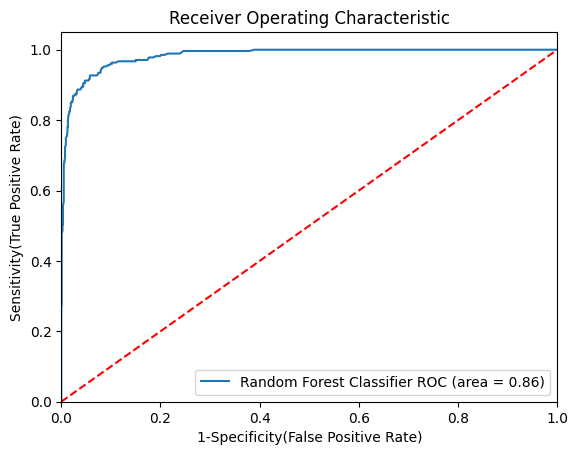

In [48]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=500,min_samples_split=2,
                                          max_features=8,max_depth=None),
    'auc':  0.8599
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, Y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 